In [2]:
from google.colab import drive
drive.mount('/content/drive')
current_path='/content/drive/MyDrive'

Mounted at /content/drive


In [3]:
import sys
sys.path.append("/content/drive/MyDrive/23-similarity/similarity-assessment/i3d")

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.models as models
from i3d import I3D
import numpy as np
from matplotlib import pyplot as plt
from videoset_dataset import  VideoFrameDataset, ImglistToTensor
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os


In [5]:
videos_root="/content/drive/MyDrive/23-similarity/data_preprocess"
annotation_file="/content/drive/MyDrive/23-similarity/data_preprocess/label.txt"

In [6]:
def plot_video(rows, cols, frame_list, plot_width, plot_height, title: str):
    fig = plt.figure(figsize=(plot_width, plot_height))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )

    for index, (ax, im) in enumerate(zip(grid, frame_list)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(index)
    plt.suptitle(title)
    plt.show()


Video Tensor Size: torch.Size([5, 3, 299, 299])


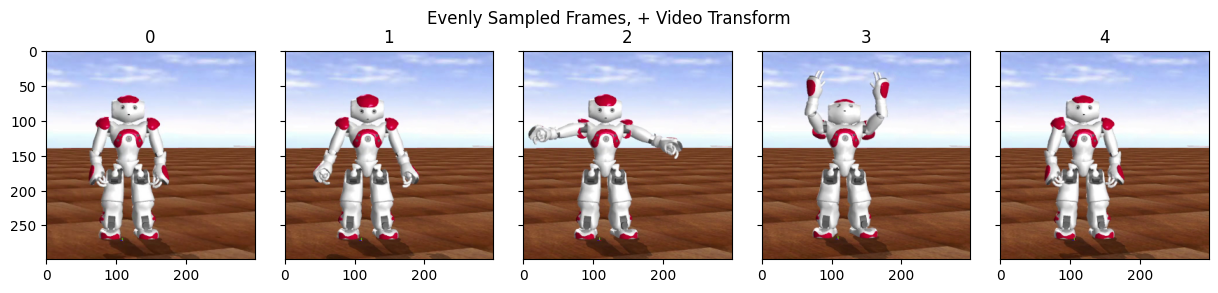

In [9]:
 """ DEMO 3 WITH TRANSFORMS """
# As of torchvision 0.8.0, torchvision transforms support batches of images
# of size (BATCH x CHANNELS x HEIGHT x WIDTH) and apply deterministic or random
# transformations on the batch identically on all images of the batch. Any torchvision
# transform for image augmentation can thus also be used  for video augmentation.
preprocess = transforms.Compose([
    ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    transforms.Resize(299),  # image batch, resize smaller edge to 299
    transforms.CenterCrop(299),  # image batch, center crop to square 299x299
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = VideoFrameDataset(
    root_path=videos_root,
    annotationfile_path=annotation_file,
    num_segments=5,
    frames_per_segment=1,
    imagefile_template='img_{:05d}.jpg',
    transform=preprocess,
    test_mode=False
)

sample = dataset[2]
frame_tensor = sample[0]  # tensor of shape (NUM_SEGMENTS*FRAMES_PER_SEGMENT) x CHANNELS x HEIGHT x WIDTH
label = sample[1]  # integer label

print('Video Tensor Size:', frame_tensor.size())

def denormalize(video_tensor):
    """
    Undoes mean/standard deviation normalization, zero to one scaling,
    and channel rearrangement for a batch of images.
    args:
        video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    """
    inverse_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()


frame_tensor = denormalize(frame_tensor)
plot_video(rows=1, cols=5, frame_list=frame_tensor, plot_width=15., plot_height=3.,
            title='Evenly Sampled Frames, + Video Transform')



""" DEMO 3 CONTINUED: DATALOADER """
dataloader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

In [8]:
for epoch in range(10):
    for video_batch, labels in dataloader:
        """
        Insert Training Code Here
        """
        print(labels)
        print("\nVideo Batch Tensor Size:", video_batch.size())
        print("Batch Labels Size:", labels.size())

tensor([4, 6])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([4, 3])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([6, 3])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([1, 3])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([5, 4])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([7, 6])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([3, 6])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([1, 3])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([1, 2])

Video Batch Tensor Size: torch.Size([2, 5, 3, 299, 299])
Batch Labels Size: torch.Size([2])
tensor([0, 3])

Video Batch 

KeyboardInterrupt: ignored